$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\wv_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

# Classification with Linear Logistic Regression

## Motivation and Setup

Recall that a linear model used for classification can result in masking. We discussed fixing this by using different
shaped membership functions, other than linear.

Our first approach to this was to use generative models (Normal distributions) to model the data
from each class, forming $p(\xv|C=k)$.  Using Bayes Theorem, we converted this to $p(C=k|\xv)$ and
derived QDA and LDA.

Now we will derive a linear model that directly predicts $p(C=k|\xv)$, resulting in the algorithm called logisitic
regression.  It is derived to maximize the likelihood of the data, given a bunch of samples and their class labels.

Remember this picture?

<img src="http://www.cs.colostate.edu/~anderson/cs545/notebooks/figures/indicatorvarsmax2.png" width=400>

The problem was that the green line for Class 2 was too low.
In fact, all lines are too low in the middle of x range.  Maybe we
can reduce the masking effect by

   * requiring the function values to be between 0 and 1, and
   * requiring them to sum to 1 for every value of x.

We can satisfy those two requirements by directly representing
$p(C=k|\xv)$ as

$$
    \begin{align*}
      p(C=k|\xv) = \frac{f(\xv;\wv_k)}{\sum_{m=1}^K f(\xv;\wv_m)}
    \end{align*}
$$

with $f(\xv;\wv) \ge 0$. We haven't discussed the form of $f$ yet, but $\wv$
represents the parameters of $f$ that we will tune to fit the
training data (later).

This is certainly an expression that is between 0 and 1 for
any $\xv$.
And we have $p(C=k|\xv)$ expressed directly, as opposed to
the previous generative approach of first modeling $p(\xv|C=k)$
and using Bayes' theorem to get $p(C=k|\xv)$.

Let's give the above expression another name

$$
    \begin{align*}
      g_k(\xv) = p(C=k|\xv) = \frac{f(\xv;\wv_k)}{\sum_{m=1}^K f(\xv;\wv_m)}
    \end{align*}
$$

## Derivation

Whatever we choose for $f$, we must make a plan for
optimizing its parameters $\wv$.  How?

Let's maximize the likelihood of the data.  So, what is the
likelihood of training data consisting of samples $\{\xv_1, \xv_2, \ldots, \xv_N\}$ and class indicator variables

$$
  \begin{align*}
    \begin{pmatrix}
      t_{1,1} & t_{1,2} & \ldots & t_{1,K}\\
      t_{2,1} & t_{2,2} & \ldots & t_{2,K}\\
      \vdots\\
      t_{N,1} & t_{N,2} & \ldots & t_{N,K}
    \end{pmatrix}
  \end{align*}
$$

with every value $t_{n,k}$ being 0 or 1, and each row of this matrix
contains a single 1? (We can also express $\{\xv_1, \xv_2,
\ldots, \xv_N\}$ as an $N \times D$ matrix, but we will be using
single samples $\xv_n$ more often in the following.)

## Data Likelihood

The likelihood is just the product of all $p(C=\text{class of }
n^\text{th}\text{ sample}\,|\,\xv_n)$ values
for sample $n$.  A common way to express this product, using those handy indicator variables is

$$
    \begin{align*}
      L(\betav) = \prod_{n=1}^N \prod_{k=1}^K p(C=k\,|\, \xv_n)^{t_{n,k}}
    \end{align*}
$$


Say we have three classes ($K=3$) and training sample $n$ is from Class 2, then the  product is

$$
      \begin{align*}
        p(C=1\,|\,\xv_n)^{t_{n,1}} p(C=2\,|\,\xv_n)^{t_{n,2}}
        p(C=3\,|\,\xv_n)^{t_{n,3}} & = 
         p(C=1\,|\,\xv_n)^0 p(C=2\,|\,\xv_n)^1 p(C=3\,|\,\xv_n)^0 \\
        & = 1\; p(C=2\,|\,\xv_n)^1 \; 1 \\
        & = p(C=2\,|\,\xv_n) 
      \end{align*}
$$

This shows how the indicator variables as exponents select the correct terms to be included in the product.

## Maximizing the Data Likelihood

So, we want to find $\wv$ that maximizes the data likelihood.  How shall we proceed?

$$
    \begin{align*}
      L(\wv) & = \prod_{n=1}^N \prod_{k=1}^K p(C=k\,|\, \xv_n) ^ {t_{n,k}}
    \end{align*}
$$


Right.  Find the derivative with respect to each component of $\wv$, or the gradient with respect to $\wv$.  But there is
a mess of products in this. So...

Right again.  Work with the natural logarithm  $\log L(\wv)$ which we will call $LL(\wv)$.

$$
    \begin{align*}
      LL(\wv) = \log L(\wv) = \sum_{n=1}^N \sum_{k=1}^K t_{n,k}  \log p(C=k\,|\,\xv_n)
    \end{align*}
$$

## Gradient Ascent

Unfortunately, the gradient of $LL(\wv)$ with respect to
$\wv$ is not linear in $\wv$, so we cannot simply set the
result equal to zero and solve for $\wv$.

Instead, we do gradient ascent. (Why "ascent"?)

  * Initialize $\wv$ to some value.
  * Make small change to $\wv$ in the direction of the  gradient of $LL(\wv)$ with respect to $\wv$  (or $\grad_{\wv} LL(\wv)$)
  * Repeat above step until $LL(\wv)$ seems to be at a maximum.

$$
      \begin{align*}
        \wv \leftarrow \wv + \alpha \grad_{\wv} LL(\wv)
      \end{align*}
$$

where $\alpha$ is a constant that affects the step size.

Remember that $\wv$ is a matrix of parameters, with, let's
say, columns corresponding to the values required for each $f$, of
which there are $K-1$.

We can work on the update formula and $\grad_{\wv} LL(\wv)$ one column at
a time

$$
    \begin{align*}
        \wv_k  \leftarrow \wv_k + \alpha \grad_{\wv_k} LL(\wv)
    \end{align*}
$$

and combine them at the end.

$$
    \begin{align*}
        \wv  \leftarrow \wv + \alpha (\grad_{\wv_1} LL(\wv),
        \grad_{\wv_2} LL(\wv), \ldots, \grad_{\wv_{K-1}} LL(\wv))
    \end{align*}
$$


Remembering that $\frac{\partial \log h(x)}{\partial x} = \frac{1}{h(x)}\frac{\partial h(x)}{x}$ and
that $p(C=k|\xv_n) = g_k(\xv_n)$ 

$$
      \begin{align*}
      LL(\wv) & = \sum_{n=1}^N \sum_{k=1}^K  t_{n,k} \log p(C=k\,|\,\xv_n)\\
      & = \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log g_k(\xv_n)\\
      \grad_{\wv_j} LL(\wv) & = \sum_{n=1}^N \sum_{k=1}^K
      \frac{t_{n,k}}{g_k(\xv_n)} \grad_{\wv_j} g_k(\xv_n)
      \end{align*}
$$

 We also want $g_k(\xv_n)$ to be the probability $P(C=k | \xv_n)$, so need it to be between 0 and 1 for all $k$ and we want $\sum_{k=1}^K g_k(\xv_n) = 1$.  And, hey, wouldn't it be super nice if $\grad_{\wv_j} g_k(\xv_n)$
includes the factor $g_k(\xv_n)$ so that it would cancel
with the $g_k(\xv_n)$ in the denominator. 

The following definition does all of this.  This is often referred to as a *softmax* function.

$$
    \begin{align*}
      g_k(\xv_n) & = \frac{\ebx{k}}{\sum_{m=1}^{K} \ebx{m}}
    \end{align*}
$$

Now we can work on $\grad_{\wv_j} g_k(\xv_n)$.

$$
\begin{align*}
g_k(\xv_n) = \frac{\ebx{k}}{\sum_{m=1}^{K} \ebx{m}}
\end{align*}
$$

So

$$
    \begin{align*}
      \grad_{\wv_j} g_k(\xv_n) & = \grad_{\wv_j} \left (\frac{\ebx{k}}{\sum_{m=1}^{K} \ebx{m}} \right )\\
    & = \grad_{\wv_j} \left [ \left (\sum_{m=1}^{K} \ebx{m} \right )^{-1} \ebx{k} \right ] 
    \end{align*}
$$
Since
$$
\begin{align*}
\grad_{\wv_j} \ebx{k} &= \begin{cases}
\xv_n \ebx{k}, & \text{if } k=j\\
0 & \text{otherwise}
\end{cases}
\end{align*}
$$
and
$$
\begin{align*}
\grad_{\wv_j} \sum_{m=1}^K-1 \ebx{m} &= \xv_n \ebx{k}
\end{align*}
$$
then
$$
    \begin{align*}
      \grad_{\wv_j} g_k(\xv_n) & = \grad_{\wv_j} \left (\frac{\ebx{k}}{\sum_{m=1}^{K} \ebx{m}} \right )\\
    & = -1 \left (\sum_{m=1}^{K} \ebx{m} \right )^{-2} \xv_n \ebx{j}
    \ebx{k} + \left (\sum_{m=1}^{K} \ebx{m} \right )^{-1} 
    \begin{cases} \xv_n \ebx{k},& \text{if} j=k\\ 0,& \text{otherwise} \end{cases}\\
& = -\frac{\ebx{k}}{\sum_{m=1}^{K} \ebx{m}}
  \frac{\ebx{j}}{\sum_{m=1}^{K} \ebx{j}} \xv_n +
  \begin{cases} \frac{\ebx{j}}{\sum_{m=1}^{K} \ebx{j}} \xv_n,& \text{if} j=k\\ 0,& \text{otherwise} \end{cases}\\
%& = \frac{\ebx{k}}{\sum_{m=1}^{K} \ebx{m} } 
& = - g_k(\xv_n) g_j(\xv_n) \xv_n + \begin{cases} g_j(\xv_n) \xv_n,^ \text{if} j=k\\ 0,& \text{otherwise} \end{cases}\\
& = g_k(\xv_n) (\delta_{jk} - g_j(\xv_n)) \xv_n
    \end{align*}
$$
where $\delta_{jk} = 1$ if $j=k$, 0 otherwise.

Substituting this back into the log likelihood expression, we get

$$
    \begin{align*}
      \grad_{\wv_j} LL(\wv) & = \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{g_k(\xv_n)} \grad_{\wv_j} g_k(\xv_n)\\
    & = \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{g_k(\xv_n)} \left (g_k(\xv_n) (\delta_{jk} - g_j(\xv_n)) \xv_n \right )\\
    & = \sum_{n=1}^N \left ( \sum_{k=1}^K t_{n,k} \delta_{jk} -
  g_j(\xv_n) \sum_{k=1}^K t_{n,k} \right ) \xv_n\\
& = \sum_{n=1}^N  (t_{n,j} - g_j(\xv_n)) \xv_n
    \end{align*}
$$

which results in this update rule for $\wv_j$

$$
    \begin{align*}
        \wv_j  \leftarrow \wv_j + \alpha \sum_{n=1}^N
        (t_{n,j} - g_j(\xv_n)) \xv_n
        \end{align*}
$$


How do we do this in python?  First, a summary of the derivation.

## Derivation Summary

$P(C=k\,|\,\xv_n)$ and the data likelihood we want to maximize:

$$
    \begin{align*}
      g_k(\xv_n) & = P(C=k\,|\,\xv_n) =
      \frac{f(\xv_n;\wv_k)}{\sum_{m=1}^{K} f(\xv_n;\wv_m)}\\
      f(\xv_n;\wv_k) & = \left \{ \begin{array}{ll} \ebx{k}; & k < K\\ 1;& k = K \end{array} \right .\\
      L(\wv) & = \prod_{n=1}^N \prod_{k=1}^K p(C=k\,|\, \xv_n) ^{t_{n,k}}\\
      & = \prod_{n=1}^N \prod_{k=1}^K g_k(\xv_n)^{t_{n,k}}
    \end{align*}
$$


Gradient of log likelihood with respect to $\wv_j$:

$$         
    \begin{align*}
      \grad_{\wv_j} LL(\wv) & = \sum_{n=1}^N \sum_{k=1}^K
      \frac{t_{n,k}}{g_k(\xv_n)} \grad_{\wv_j}
      g_k(\xv_n)\\
%& = \sum_{n=1}^N \left ( \sum_{k=1}^K t_{n,k} \delta_{jk} -
%  g_j(\xv_n) \sum_{k=1}^K t_{n,k} \right )\\
& = \sum_{n=1}^N \xv_n (t_{n,j} - g_j(\xv_n))
\end{align*}
$$

which results in this update rule for $\wv_j$

$$
    \begin{align*}
        \wv_j  \leftarrow \wv_j + \alpha \sum_{n=1}^N
        (t_{n,j} - g_j(\xv_n)) \xv_n
        \end{align*}
$$

## Implementation in Python

Update rule for $\wv_j$

$$
    \begin{align*}
      \wv_j  \leftarrow \wv_j + \alpha \sum_{n=1}^N
      (t_{n,j} - g_j(\xv_n)) \xv_n
    \end{align*}
$$

What are shapes of each piece?  Remember that whenever we are dealing with weighted sums of inputs, as we are here, add the constant 1 to the front of each sample.

  * $\xv_n$ is $(D+1) \times 1$ ($+1$ for the constant 1 input)
  * $\wv_j$ is  $(D+1) \times 1$ 
  * $t_{n,j} - g_j(\xv_n)$ is   a scalar

So, this all works. But, notice the sum is over $n$, and each
term in the product as $n$ components, so we can do this as a dot product.

Let's remove the sum and replace subscript $n$ with
*. 

$$
    \begin{align*}
      \wv_j  &\leftarrow \wv_j + \alpha \sum_{n=1}^N
      (t_{n,j} - g_j(\xv_n)) \xv_n\\
      \wv_j  &\leftarrow \wv_j + \alpha (t_{*,j} - g_j(\xv_*)) \xv_*\\
    \end{align*}
$$

What are shapes of each piece?

  * $(t_{*,j} - g_j(\xv_*))$ is $N \times 1$
  * $\xv_* = X$ is  $N \times (D+1)$
  * $\wv_j$ is  $(D+1) \times 1$ 

So, this will work if we transpose $X$ and premultiply it and define
$g$ as a function that accepts $\Xv$.

$$
    \begin{align*}
%      \wv_j  &\leftarrow \wv_j + \alpha (t_{*,j} -
%      g(\xv_*;\wv_j)) \xv_*\\
      \wv_j  &\leftarrow \wv_j + \alpha \Xv^T (t_{*,j} -
      g_j(\Xv))
    \end{align*}
$$

Let's keep going...and try to make this expression work for
all of the $\wv$'s.
Playing with the subscripts again, replace $j$ with *.

$$
    \begin{align*}
      \wv_j  &\leftarrow \wv_j + \alpha \Xv^T (t_{*,j} - g_j(\Xv))\\
      \wv_*  &\leftarrow \wv_* + \alpha \Xv^T (t_{*,*} - g_*(\Xv))
    \end{align*}
$$

Now what are shapes? 

  * $\wv_* = \wv$ is  $(D+1) \times K$
  * $t_{*,*} = T$ is  $N \times K$
  * $g_*(\Xv)$ is   $N \times (K-1)$
  * $t_{*,*} - g_*(\Xv)$ is  $N \times K$
  * So, $\Xv^T (t_{*,*} - g_*(\Xv))$ is  $(D+1) \times K$
  * So, $\Xv^T (T - g(\Xv))$ is  $(D+1) \times K$

Now our update equation for all $\wv$'s is

$$
    \begin{align*}
      \wv  &\leftarrow \wv + \alpha \Xv^T (T - g(\Xv))
    \end{align*}
$$


We had defined, for $k = 1,\ldots, K$,

$$
    \begin{align*}
        g_k(\xv) &=  \dfrac{\ebx{k}}{\sum_{m=1}^K \ebx{m}}
      \end{align*}
$$

Changing these to handle all samples $\Xv$ and all parameters
$\wv$ we have

$$
    \begin{align*}
     g(\Xv) & = \frac{e^{\Xv \wv}}{\text{rowSums}(e^{\Xv \wv})}
    \end{align*}
$$


Given training data $\Xv$ ($N\times (D+1)$) and class
indicator variables $T$ ($N \times K)$), these expressions
can be performed with the following code.

First, we need a function to create indicator variables from the class labels, to get

$$
\begin{bmatrix}
1\\
2\\
2\\
1\\
3
\end{bmatrix}
\Rightarrow
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 1 & 0\\
1 & 0 & 0\\
0 & 0 & 1
\end{bmatrix}
$$

In [1]:
%load_ext autoreload
%autoreload 2

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [34]:
def make_indicator_vars(T):
    # Make sure T is two-dimensional. Should be nSamples x 1.
    if T.ndim == 1:
        T = T.reshape((-1, 1)) 
    return (T == np.unique(T)).astype(int)

In [35]:
T = np.array([1,2,2,1,3]).reshape((-1,1))
T

array([[1],
       [2],
       [2],
       [1],
       [3]])

In [36]:
make_indicator_vars(T)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [37]:
def g(X, w):
    fs = np.exp(X @ w)  # N x K
    denom = np.sum(fs, axis=1).reshape((-1, 1))
    gs = fs / denom
    return gs

The function ```g``` is sometimes called the *softmax* function. 

In [38]:
def softmax(X, w):
    fs = np.exp(X @ w)  # N x K
    denom = np.sum(fs, axis=1).reshape((-1, 1))
    gs = fs / denom
    return gs

Now the updates to $\wv$ can be formed with code like this.

    TI = make_indicator_vars(T)   
    w = np.zeros((X.shape[1], TI.shape[1]))
    alpha = 0.0001
    for step in range(1000):
        Y = softmax(X, w)
        w = w + alpha * X.T @ (TI - Y)         

Here is code for applying linear logistic regression to the Parkinsons data from last lecture:  [parkinsons data set](https://archive.ics.uci.edu/ml/datasets/Parkinsons) 

In [39]:
import pandas as pd
data = pd.read_csv('parkinsons.data')
data.shape

(195, 24)

In [40]:
X = data
X = X.drop(['status', 'name'], axis=1)
Xnames = X.columns.tolist()
X = X.values

T = data['status'].values
T = T.reshape((-1, 1))
Tname = 'status'

X.shape, Xnames, T.shape, Tname

((195, 22),
 ['MDVP:Fo(Hz)',
  'MDVP:Fhi(Hz)',
  'MDVP:Flo(Hz)',
  'MDVP:Jitter(%)',
  'MDVP:Jitter(Abs)',
  'MDVP:RAP',
  'MDVP:PPQ',
  'Jitter:DDP',
  'MDVP:Shimmer',
  'MDVP:Shimmer(dB)',
  'Shimmer:APQ3',
  'Shimmer:APQ5',
  'MDVP:APQ',
  'Shimmer:DDA',
  'NHR',
  'HNR',
  'RPDE',
  'DFA',
  'spread1',
  'spread2',
  'D2',
  'PPE'],
 (195, 1),
 'status')

In [41]:
def standardize(X, mean, stds):
    return (X - mean) / stds

In [42]:
import qdalda   # from previous lecture

To generate our training, validation and testing partitions we need to partition data into folds on a class by class basis to make each fold have appoximately the same proportion of samples from each class.  Here is a function that does this. This form of partitioning is referred to as "stratified".

In [43]:
def generate_stratified_partitions(X, T, n_folds, validation=True, shuffle=True):
    '''Generates sets of  Xtrain,Ttrain,Xvalidate,Tvalidate,Xtest,Ttest
      or
       sets of Xtrain,Ttrain,Xtest,Ttest if validation is False
    Build dictionary keyed by class label. Each entry contains rowIndices and start and stop
    indices into rowIndices for each of n_folds folds'''

    def rows_in_fold(folds, k):
        all_rows = []
        for c, rows in folds.items():
            class_rows, starts, stops = rows
            all_rows += class_rows[starts[k]:stops[k]].tolist()
        return all_rows

    def rows_in_folds(folds, ks):
        all_rows = []
        for k in ks:
            all_rows += rows_in_fold(folds, k)
        return all_rows

    row_indices = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(row_indices)
    folds = {}
    classes = np.unique(T)
    for c in classes:
        class_indices = row_indices[np.where(T[row_indices, :] == c)[0]]
        n_in_class = len(class_indices)
        n_each = int(n_in_class / n_folds)
        starts = np.arange(0, n_each * n_folds, n_each)
        stops = starts + n_each
        stops[-1] = n_in_class
        folds[c] = [class_indices, starts, stops]

    for test_fold in range(n_folds):
        if validation:
            for validate_fold in range(n_folds):
                if test_fold == validate_fold:
                    continue
                train_folds = np.setdiff1d(range(n_folds), [test_fold, validate_fold])
                rows = rows_in_fold(folds, test_fold)
                Xtest = X[rows, :]
                Ttest = T[rows, :]
                rows = rows_in_fold(folds, validate_fold)
                Xvalidate = X[rows, :]
                Tvalidate = T[rows, :]
                rows = rows_in_folds(folds, train_folds)
                Xtrain = X[rows, :]
                Ttrain = T[rows, :]
                yield Xtrain, Ttrain, Xvalidate, Tvalidate, Xtest, Ttest
        else:
            # No validation set
            train_folds = np.setdiff1d(range(n_folds), [test_fold])
            rows = rows_in_fold(folds, test_fold)
            Xtest = X[rows, :]
            Ttest = T[rows, :]
            rows = rows_in_folds(folds, train_folds)
            Xtrain = X[rows, :]
            Ttrain = T[rows, :]
            yield Xtrain, Ttrain, Xtest, Ttest

In [44]:
for Xtrain, Ttrain, Xval, Tval, Xtest, Ttest in generate_stratified_partitions(X, T, 4):
    print(f'{len(Ttrain)} {np.mean(Ttrain == 0):.3f} {len(Tval)} {np.mean(Tval == 0):.3f} {len(Ttest)} {np.mean(Ttest == 0):.3f}')
print('\n', np.mean(T == 0))

99 0.242 48 0.250 48 0.250
99 0.242 48 0.250 48 0.250
96 0.250 51 0.235 48 0.250
99 0.242 48 0.250 48 0.250
99 0.242 48 0.250 48 0.250
96 0.250 51 0.235 48 0.250
99 0.242 48 0.250 48 0.250
99 0.242 48 0.250 48 0.250
96 0.250 51 0.235 48 0.250
96 0.250 48 0.250 51 0.235
96 0.250 48 0.250 51 0.235
96 0.250 48 0.250 51 0.235

 0.24615384615384617


Now we can write a function that can iterate over all ways of making training, validation and test sets from n_folds partitions and train QDA, LDA and linear logistic regression models to the data.

In the following function the `break` statement at the end of the for loop stops execution after just one run of the cross-validation method, to save time.  To use all runs, we would have to calculate the mean errors, or accuracies, over all cross-validation runs.

In [45]:
def run_park_logreg(X, T, n_folds):

    for Xtrain, Ttrain, Xtest, Ttest in generate_stratified_partitions(X, T, n_folds, validation=False):

        means,stds = np.mean(Xtrain, 0), np.std(Xtrain ,0)
        Xtrains = standardize(Xtrain, means, stds)
        Xtests = standardize(Xtest, means, stds)

        Xtrains1 = np.hstack(( np.ones((Xtrains.shape[0], 1)), Xtrains))
        Xtests1 = np.hstack(( np.ones((Xtests.shape[0], 1)), Xtests))

        # New stuff for linear logistic regression

        TtrainI = make_indicator_vars(Ttrain)
        TtestI = make_indicator_vars(Ttest)

        w = np.zeros((Xtrains1.shape[1], TtrainI.shape[1]))
        likelihood = []
        alpha = 0.0001
        for step in range(10000):
            # forward pass
            gs = softmax(Xtrains1, w)
            # backward pass and weight update
            w = w + alpha * Xtrains1.T @ (TtrainI - gs)
            # convert log likelihood to likelihood
            likelihoodPerSample = np.exp( np.sum(TtrainI * np.log(gs)) / Xtrains.shape[0])
            likelihood.append(likelihoodPerSample)

        plt.figure(figsize=(8, 3))
        
        plt.subplot2grid((1, 4), (0, 0))
        plt.plot(likelihood)
        plt.ylabel('Likelihood')
        plt.xlabel('Epoch')

        logregOutput = g(Xtrains1, w)
        predictedTrain = np.argmax(logregOutput, axis=1)
        logregOutput = g(Xtests1, w)
        predictedTestLR = np.argmax(logregOutput, axis=1)

        print("LogReg: Percent correct: Train {:.3g} Test {:.3g}".format(percent_correct(predictedTrain, Ttrain),
                                                                         percent_correct(predictedTestLR, Ttest)))

        # Previous QDA, LDA code

        qda = qdalda.QDA()
        qda.train(Xtrain, Ttrain)
        qdaPredictedTrain = qda.use(Xtrain)
        qdaPredictedTest = qda.use(Xtest)
        print("   QDA: Percent correct: Train {:.3g} Test {:.3g}".format(percent_correct(qdaPredictedTrain, Ttrain),
                                                                         percent_correct(qdaPredictedTest, Ttest)))

        lda = qdalda.LDA()
        lda.train(Xtrain, Ttrain)
        ldaPredictedTrain = qda.use(Xtrain)
        ldaPredictedTest = qda.use(Xtest)
        print("   LDA: Percent correct: Train {:.3g} Test {:.3g}".format(percent_correct(ldaPredictedTrain, Ttrain),
                                                                         percent_correct(ldaPredictedTest, Ttest)))

        plt.subplot2grid((1, 4), (0, 1), colspan=3)
        plt.plot(Ttest, 'o-', label='Target')
        plt.plot(predictedTestLR, 'o-', label='LR')
        plt.plot(qdaPredictedTest, 'o-', label='QDA')
        plt.plot(ldaPredictedTest, 'o-', label='LDA')
        plt.legend()
        plt.ylabel('Class')
        plt.xlabel('Sample')
        plt.ylim(-0.1, 1.1)
        
        plt.tight_layout()

        break  # only do one data partition

def percent_correct(p, t):
    return np.sum(p.ravel()==t.ravel()) / float(len(t)) * 100

<IPython.core.display.Javascript object>


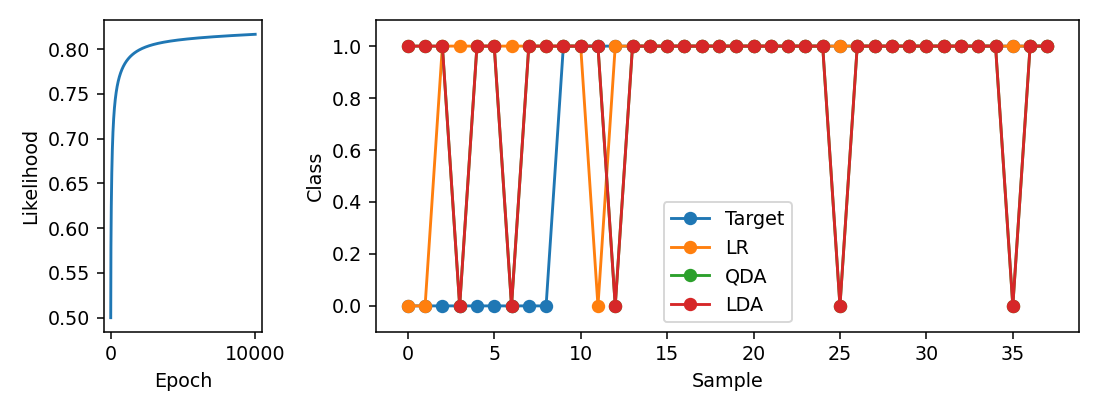

LogReg: Percent correct: Train 92.4 Test 78.9
   QDA: Percent correct: Train 99.4 Test 73.7
   LDA: Percent correct: Train 99.4 Test 73.7


In [49]:
run_park_logreg(X, T, 5)

<IPython.core.display.Javascript object>


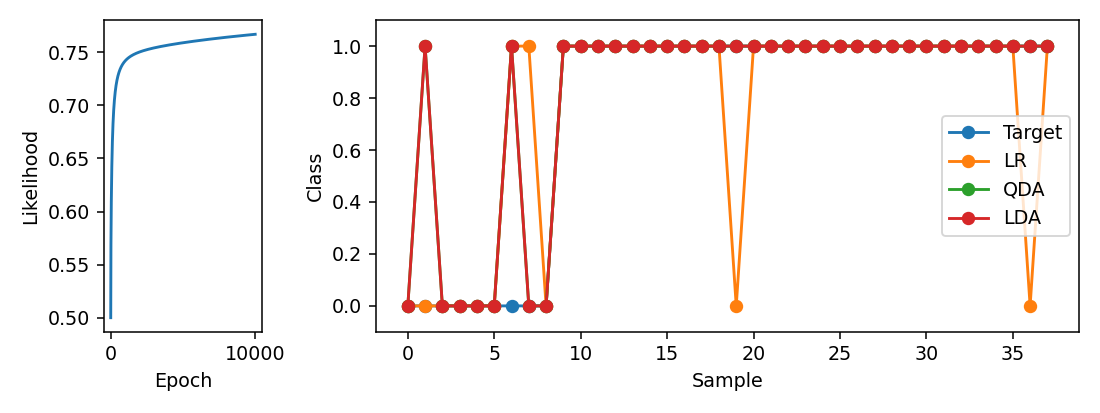

LogReg: Percent correct: Train 86 Test 89.5
   QDA: Percent correct: Train 98.7 Test 94.7
   LDA: Percent correct: Train 98.7 Test 94.7


In [47]:
run_park_logreg(X, T, 5)

<IPython.core.display.Javascript object>


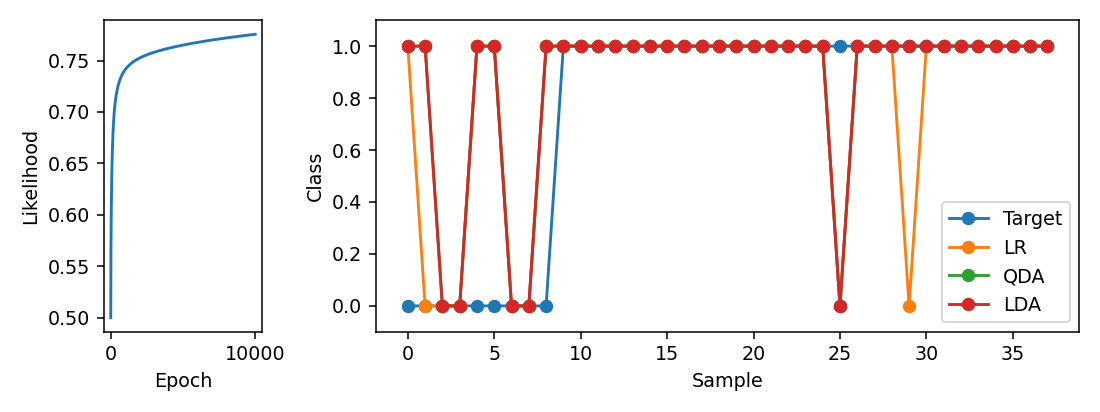

LogReg: Percent correct: Train 90.4 Test 84.2
   QDA: Percent correct: Train 97.5 Test 84.2
   LDA: Percent correct: Train 97.5 Test 84.2


In [48]:
run_park_logreg(X, T, 5)

The code above is doing stochastic gradient descent (SGD) in the gradient of the log
likelihood.  Do we have a better way of doing this gradient ascent?  Sure, **let's try Adam**.  But first we must define our error function to be minimized and its gradient function.

The
function to be optimized should be the negative of the log likelihood,
because SGD is designed to minimize the function.  And the gradient
function must also include this negative.

Here are definitions of the log likehood and its gradient again.
$$
      \begin{align*}
      LL(\wv) & = \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log g_k(\xv_n)\\
      \grad_{\wv_j} LL(\wv)  & = \sum_{n=1}^N \xv_n (t_{n,j} - g_j(\xv_n))
      \end{align*}
$$

or, as matrices, and using the mean log likelihood,

$$
    \begin{align*}
    Y &= g(\Xv)\\
    LL(\wv) & = \text{np.mean}(T \cdot \log Y , \text{axis}=0) \\
      \grad_{\wv_j} LL(\wv) & =  \Xv^T (T - Y) \;/\; (N\,K)
    \end{align*}
$$

In [50]:
import optimizers


def run_park_logreg2(X, T, n_folds):

    for Xtrain, Ttrain, Xtest, Ttest in generate_stratified_partitions(X, T, n_folds, validation=False):

        means,stds = np.mean(Xtrain,0), np.std(Xtrain,0)
        Xtrains = standardize(Xtrain,means,stds)
        Xtests = standardize(Xtest,means,stds)

        Xtrains1 = np.hstack(( np.ones((Xtrains.shape[0],1)), Xtrains))
        Xtests1 = np.hstack(( np.ones((Xtests.shape[0],1)), Xtests))

        TtrainI = make_indicator_vars(Ttrain)
        TtestI = make_indicator_vars(Ttest)

        n_classes = TtrainI.shape[1]

        all_weights = np.zeros(Xtrains1.shape[1] * TtrainI.shape[1])
        
        w = all_weights.reshape(( Xtrains1.shape[1], TtrainI.shape[1])) # n_inputs x n_classes

        def softmax(X):
            fs = np.exp(X @ w)  # N x K
            denom = np.sum(fs, axis=1).reshape((-1, 1))
            gs = fs / denom
            return gs

        def neg_log_likelihood():
            # w = warg.reshape((-1,K))
            Y = softmax(Xtrains1)
            return - np.mean(TtrainI * np.log(Y))

        def gradient_neg_log_likelihood():
            Y = softmax(Xtrains1)
            grad = Xtrains1.T @ (Y - TtrainI) / (TtrainI.shape[0] * TtrainI.shape[1])
            return grad.reshape((-1))


        optimizer = optimizers.Optimizers(all_weights)
        to_likelihood = lambda nll: np.exp(-nll)
        
        likelihood_trace = optimizer.adam(neg_log_likelihood, gradient_neg_log_likelihood,
                                         n_epochs=10000, learning_rate=0.01, error_convert_f=to_likelihood)


        logregOutput = softmax(Xtrains1)
        predictedTrain = np.argmax(logregOutput,axis=1)
        logregOutput = softmax(Xtests1)
        predictedTest = np.argmax(logregOutput,axis=1)

        print("LogReg: Percent correct: Train {:.3g} Test {:.3g}".format(percent_correct(predictedTrain,Ttrain),percent_correct(predictedTest,Ttest)))

        plt.plot(likelihood_trace)
        plt.xlabel('Epoch')
        plt.ylabel('Likelihood')
        
        # Previous QDA code

        qda = qdalda.QDA()
        qda.train(Xtrain, Ttrain)
        qdaPredictedTrain = qda.use(Xtrain)
        qdaPredictedTest = qda.use(Xtest)
        print("   QDA: Percent correct: Train {:.3g} Test {:.3g}".format(percent_correct(qdaPredictedTrain, Ttrain),
                                                                         percent_correct(qdaPredictedTest, Ttest)))

        lda = qdalda.LDA()
        lda.train(Xtrain, Ttrain)
        ldaPredictedTrain = qda.use(Xtrain)
        ldaPredictedTest = qda.use(Xtest)
        print("   LDA: Percent correct: Train {:.3g} Test {:.3g}".format(percent_correct(ldaPredictedTrain, Ttrain),
                                                                         percent_correct(ldaPredictedTest, Ttest)))
        
        break # remove to show all partitioning results

Adam: Epoch 1000 RMSE=0.89371
Adam: Epoch 2000 RMSE=0.89727
Adam: Epoch 3000 RMSE=0.89781
Adam: Epoch 4000 RMSE=0.89787
Adam: Epoch 5000 RMSE=0.89788
Adam: Epoch 6000 RMSE=0.89788
Adam: Epoch 7000 RMSE=0.89788
Adam: Epoch 8000 RMSE=0.89788
Adam: Epoch 9000 RMSE=0.89788
Adam: Epoch 10000 RMSE=0.89788
LogReg: Percent correct: Train 90.1 Test 83.3


<IPython.core.display.Javascript object>


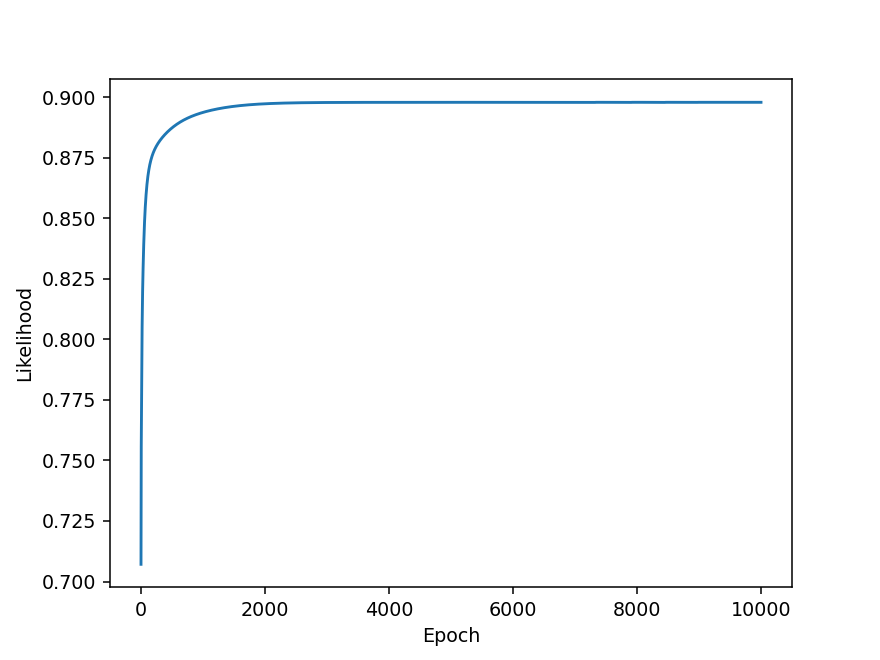

   QDA: Percent correct: Train 98.2 Test 79.2
   LDA: Percent correct: Train 98.2 Test 79.2


In [53]:
run_park_logreg2(X, T, 8)

Adam: Epoch 1000 RMSE=0.88788
Adam: Epoch 2000 RMSE=0.89210
Adam: Epoch 3000 RMSE=0.89259
Adam: Epoch 4000 RMSE=0.89264
Adam: Epoch 5000 RMSE=0.89265
Adam: Epoch 6000 RMSE=0.89267
Adam: Epoch 7000 RMSE=0.89267
Adam: Epoch 8000 RMSE=0.89267
Adam: Epoch 9000 RMSE=0.89267
Adam: Epoch 10000 RMSE=0.89268
LogReg: Percent correct: Train 90.4 Test 89.5


<IPython.core.display.Javascript object>


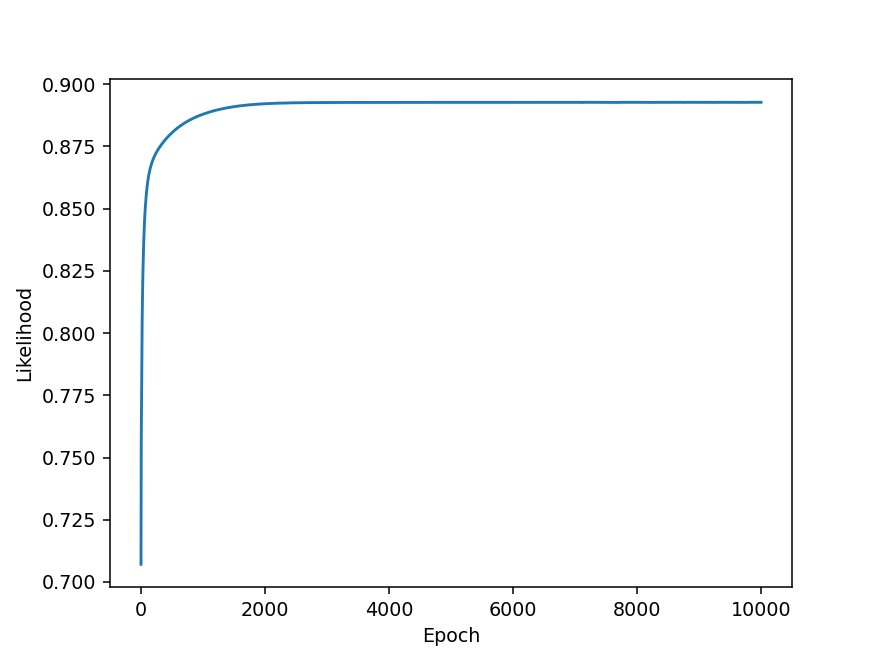

   QDA: Percent correct: Train 99.4 Test 89.5
   LDA: Percent correct: Train 99.4 Test 89.5


In [54]:
run_park_logreg2(X, T, 5)

How would you change this to run SGD instead of Adam for the linear logistic regression?